<a href="https://colab.research.google.com/github/oshan35/Epileptic-Seizure-Prediction-with-EEG/blob/main/Random_Forest_for_ESD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/EEG-Projects/CHB-MIT-Extracted-Featuers/intermediate_dataframe10.csv")

In [5]:
dataset.head()

,total_energy,cD_Energy,cA_Energy,cD_mean,cA_mean,cD_std,cA_std,std_deviation,skewness,kurtosis,...,peak_to_peak_voltage,total_signal_area,decorrelation_time,delta_power,theta_power,alpha_power,beta_power,gamma_power,spectral_entropy,seizure
0,1.049129e-08,2.964715e-09,7.526573e-09,-1.058221e-06,-0.000041,0.000018,0.0,0.000018,0.000043,1.913422,...,0.000188,0.208586,21.0,1.724271e-10,6.901304e-11,1.475933e-11,2.435610e-11,7.009636e-12,3.955932,1.0
1,9.942815e-09,2.602781e-09,7.340034e-09,-2.130085e-07,0.000005,0.000016,0.0,0.000017,-0.069634,1.155495,...,0.000167,0.202015,16.5,1.688063e-10,6.410938e-11,1.274803e-11,1.533214e-11,2.343582e-12,3.804794,1.0
2,1.514415e-08,3.832308e-09,1.131184e-08,2.809866e-07,-0.000057,0.000019,0.0,0.000021,0.027133,0.563959,...,0.000177,0.250748,22.0,2.640359e-10,9.601031e-11,2.136760e-11,1.223541e-11,1.767946e-12,3.615178,1.0
3,1.241042e-08,3.621845e-09,8.788571e-09,6.408471e-07,-0.000047,0.000018,0.0,0.000020,-0.088474,0.620514,...,0.000167,0.236297,28.6,2.359125e-10,8.217361e-11,2.774180e-11,1.162628e-11,4.464775e-12,3.756513,1.0
4,2.222277e-08,5.579810e-09,1.664296e-08,-1.019392e-06,-0.000022,0.000024,0.0,0.000026,-0.127484,1.499476,...,0.000269,0.307929,25.4,4.305053e-10,1.219061e-10,2.998843e-11,5.046479e-11,6.630836e-12,3.793919,1.0


In [7]:
null_data_summary = dataset.isnull().sum()
print("Null Data Summary:")
print(null_data_summary)

Null Data Summary:
total_energy             0
cD_Energy                0
cA_Energy                0
cD_mean                  0
cA_mean                  0
cD_std                   0
cA_std                   0
std_deviation            0
skewness                65
kurtosis                65
median                   0
band_power               0
peak_to_peak_voltage     0
total_signal_area        0
decorrelation_time       0
delta_power              0
theta_power              0
alpha_power              0
beta_power               0
gamma_power              0
spectral_entropy        65
seizure                  0
dtype: int64


In [8]:
dataset.dropna(inplace=True)


In [10]:
print(dataset.isnull().sum())

total_energy            0
cD_Energy               0
cA_Energy               0
cD_mean                 0
cA_mean                 0
cD_std                  0
cA_std                  0
std_deviation           0
skewness                0
kurtosis                0
median                  0
band_power              0
peak_to_peak_voltage    0
total_signal_area       0
decorrelation_time      0
delta_power             0
theta_power             0
alpha_power             0
beta_power              0
gamma_power             0
spectral_entropy        0
seizure                 0
dtype: int64


In [11]:
y = dataset['seizure']

X = dataset.drop('cA_std', axis=1)

In [12]:
X = X.drop('seizure', axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Randomforeset

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [48]:
max_depth_values = [3, 5, 10, 100, 150, 200, 242, 300, None]
random_state_values = [0, 42, 50, 100, 150, 200]

best_accuracy = 0
best_params = {'max_depth': None, 'random_state': None}

for max_depth in max_depth_values:
    for random_state in random_state_values:
        model = RandomForestClassifier(max_depth=max_depth, random_state=random_state)
        scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
        accuracy = np.mean(scores)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'max_depth': max_depth, 'random_state': random_state}

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'max_depth': 100, 'random_state': 150}
Best Accuracy: 0.724009440389825


In [54]:
clf = RandomForestClassifier(max_depth=200, random_state=40)

In [55]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, random_state=40)

In [69]:
y_pred_randomforeset = clf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy = accuracy_score(y_test, y_pred_randomforeset)
print(accuracy)

0.7341996455995274


In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [73]:
class_names = ["seizuer", "non-seizuer"]

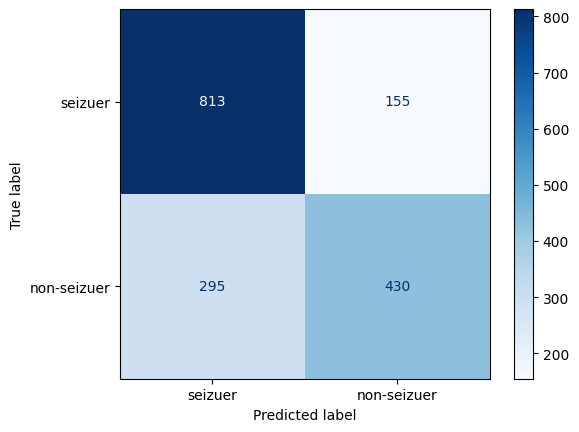

In [74]:
cm = confusion_matrix(y_test, y_pred_randomforeset)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

##SVM

In [75]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [76]:
best_svm_model = SVC(kernel='rbf', C=10, gamma=0.9, random_state=42)
best_svm_model.fit(X_train_scaled, y_train)

y_pred_svm = best_svm_model.predict(X_test_scaled)

accuracy_param = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy with Best Hyperparameters: {accuracy_param}")

Accuracy with Best Hyperparameters: 0.7424689899586533


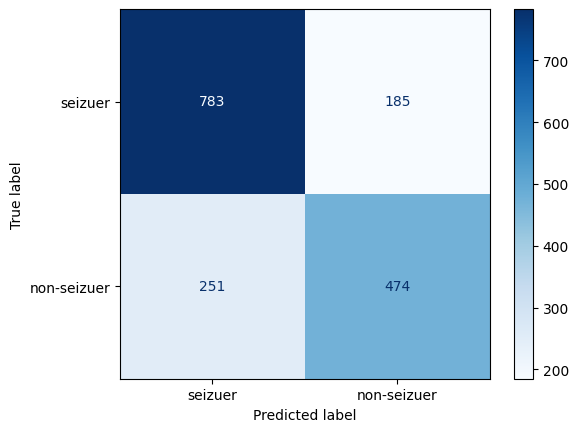

In [77]:
cm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

##Analysis

In [79]:
rand_true_svm_false = 0
rand_false_svm_true = 0
both_false = 0
for rand,svm,actual in zip(y_pred_randomforeset,y_pred_svm, y_test):
  if rand == actual and svm != actual:
    rand_true_svm_false+=1
  elif rand != actual and svm == actual:
    rand_false_svm_true+=1
  elif rand != actual and svm != actual:
    both_false +=1
print(f"rand_true_svm_false : {rand_true_svm_false}, rand_false_svm_true : {rand_false_svm_true}, both_false: {both_false}")
y_test.shape

rand_true_svm_false : 185, rand_false_svm_true : 199, both_false: 251


(1693,)